### Dependencies

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import BinaryAccuracy

### Data Extraction and Exploration

In [163]:
df = pd.read_csv("credit_risk.csv")
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [164]:
df.dtypes

Id                  int64
Age                 int64
Income              int64
Home               object
Emp_length        float64
Intent             object
Amount              int64
Rate              float64
Status              int64
Percent_income    float64
Default            object
Cred_length         int64
dtype: object

In [165]:
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [166]:
df.isnull().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

C:\Users\Kutloano MM\AppData\Local\Temp\ipykernel_8636\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

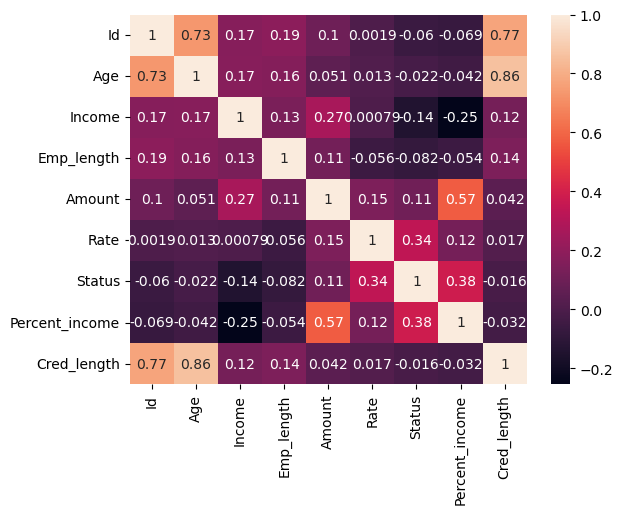

In [167]:
sns.heatmap(df.corr(), annot = True)

In [168]:
df.Intent.value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: Intent, dtype: int64

<Axes: xlabel='Amount', ylabel='Count'>

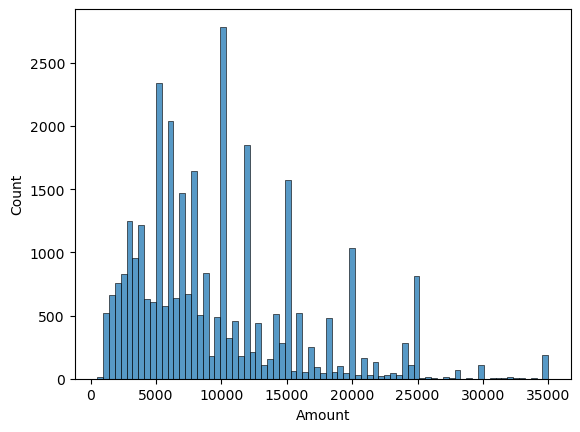

In [169]:
# Distirbution of amount
sns.histplot(df["Amount"])

<Axes: xlabel='Age', ylabel='Count'>

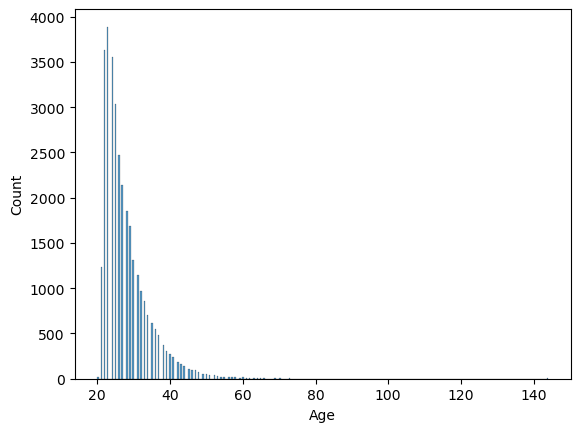

In [170]:
sns.histplot(df["Age"])

### Data Cleaning

In [171]:
df_clean = df
# Employment length in years does not normally exceed 60 years
df_clean = df_clean[df_clean['Emp_length'] <= 60]

# Delete rows with null values. Sample size is large enough
df_clean = df_clean.dropna()

### Feature Engineering

In [172]:
# Binning
df_clean['Age'] = pd.cut(
    df_clean['Age'],
    bins=[19, 29, 49, 69, np.inf],
    labels=["20-29", "30-49", "50-69", "70+"]
)

In [173]:
data = pd.get_dummies(df_clean, columns = ['Age', 'Intent', 'Home'])

In [174]:
data['Default'] = np.where(data['Default'] == "Y", 1, 0)

In [175]:
X = data.loc[:, data.columns != 'Default']
y = data['Default'].to_numpy()

# Feature Scaling
scaler = MinMaxScaler()
model = scaler.fit(X)
scaled_X = model.transform(X)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.2, random_state = 1)

### Model Training

In [177]:
nb = GaussianNB()
rfc = RandomForestClassifier(n_estimators = 100)
svm = SVC()
lr = LogisticRegression()

nb.fit(X_train, y_train)
rfc.fit(X_train, y_train)
svm.fit(X_train, y_train)
lr.fit(X_train, y_train)

C:\Users\Kutloano MM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [180]:
nb_y_pred = nb.predict(X_test)
rfc_y_pred = rfc.predict(X_test)
svm_y_pred = svm.predict(X_test)

### Model Evaluation

In [199]:
print("Accuracy score for Naive Bayes Classifier:", round(accuracy_score(y_test,nb_y_pred)*100,2), "% \n")
print("Accuracy score for Random Forest Classifier:", round(accuracy_score(y_test,rfc_y_pred)*100,2), "% \n")
print("Accuracy score for Support Vector Classifier:", round(accuracy_score(y_test,svm_y_pred)*100,2), "%")


Accuracy score for Naive Bayes Classifier: 81.22 % 

Accuracy score for Random Forest Classifier: 82.38 % 

Accuracy score for Support Vector Classifier: 81.79 %


The Random Forest Classifer model performed the best out of the three models. However, like any other machine learning model, improvements can be made such as:
- Using a standard scaler instead of a min max scaler
- Dimensionality reduction by using Principal Component Analysis
- Feature creation
- Using label encoding instead of one-hot encoding